In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import cufflinks as cf
from ipywidgets import interact

pd.options.mode.chained_assignment = None # Turning off the "SettingWithCopyWarning"

df = pd.read_csv('islamic_state.csv')

df.head()

eventid  iyear  imonth  iday country_txt     city provstate  \
0  200701190003   2007       1    19        Iraq  Baghdad   Baghdad   
1  200703010001   2007       3     1        Iraq  Baqubah    Diyala   
2  200703020002   2007       3     2        Iraq  Baghdad   Baghdad   
3  200703060002   2007       3     6        Iraq   Hillah     Babil   
4  200703110003   2007       3    11        Iraq  Unknown    Diyala   

    latitude  longitude                                 location     ...      \
0  33.295556  44.341667  Yarmouk neighborhood of western Baghdad     ...       
1  33.750000  44.633333                            Near Ba'qubah     ...       
2  33.300000  44.400000                                      NaN     ...       
3  32.483494  44.433269                                      NaN     ...       
4  33.773349  45.149450   A small village in Diyala Governorate.     ...       

  targsubtype1                                   targsubtype1_txt natlty1  \
0         77.0            Laborer (General)/Occupation Identified   217.0   
1         25.0                    Police Security Forces/Officers    95.0   
2         18.0  Government Personnel (excluding police, military)    95.0   
3         69.0                                Religion Identified    95.0   
4         69.0                                Religion Identified    95.0   

     natlty1_txt                        gname  weaptype1  \
0  United States  Islamic State of Iraq (ISI)          5   
1           Iraq  Islamic State of Iraq (ISI)          5   
2           Iraq  Islamic State of Iraq (ISI)         13   
3           Iraq  Islamic State of Iraq (ISI)          6   
4           Iraq  Islamic State of Iraq (ISI)          8   

               weaptype1_txt  nkill nwound        date  
0                   Firearms    4.0    2.0  2007-01-19  
1                   Firearms   14.0    0.0  2007-03-01  
2                    Unknown   14.0    0.0  2007-03-02  
3  Explosives/Bombs/Dynamite   92.0  200.0  2007-03-06  
4                 Incendiary   20.0    NaN  2007-03-11  

[5 rows x 25 columns]

In [92]:
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
country_txt          object
city                 object
provstate            object
latitude            float64
longitude           float64
location             object
summary              object
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
natlty1             float64
natlty1_txt          object
gname                object
weaptype1             int64
weaptype1_txt        object
nkill               float64
nwound              float64
date                 object
dtype: object

In [2]:
terror_gp = df.sort_values(by = 'country_txt', ascending = False)
terror_gp.head()

eventid  iyear  imonth  iday country_txt   city         provstate  \
2556  201506200013   2015       6    20       Yemen  Sanaa  Amanat Al Asimah   
3263  201510310032   2015      10    31       Yemen   Aden              Adan   
2841  201508110077   2015       8    11       Yemen  Sanaa  Amanat Al Asimah   
3228  201510260038   2015      10    26       Yemen   Aden              Adan   
3229  201510260042   2015      10    26       Yemen   Aden              Adan   

       latitude  longitude                                           location  \
2556  15.350040  44.201349  The incident occurred in the Zira neighborhood...   
3263  12.800194  45.033430   The incident occurred in the Inmaa neighborhood.   
2841  15.353811  44.205385                                                NaN   
3228  12.799717  45.033393                                                NaN   
3229  12.799717  45.033393                                                NaN   

         ...     targsubtype1  \
2556     ...             86.0   
3263     ...             34.0   
2841     ...              NaN   
3228     ...             94.0   
3229     ...             49.0   

                                       targsubtype1_txt natlty1  natlty1_txt  \
2556                                   Place of Worship   228.0        Yemen   
3263  Military Personnel (soldiers, troops, officers...   228.0        Yemen   
2841                                                  .   228.0        Yemen   
3228                                  Non-State Militia   228.0        Yemen   
3229             School/University/Educational Building   228.0        Yemen   

                                         gname  weaptype1  \
2556       Sanaa Province of the Islamic State          6   
3263  Adan-Abyan Province of the Islamic State          5   
2841       Sanaa Province of the Islamic State          6   
3228  Adan-Abyan Province of the Islamic State          6   
3229  Adan-Abyan Province of the Islamic State          5   

                  weaptype1_txt  nkill nwound        date  
2556  Explosives/Bombs/Dynamite    2.0    6.0  2015-06-20  
3263                   Firearms    1.0    0.0  2015-10-31  
2841  Explosives/Bombs/Dynamite    0.0    0.0  2015-08-11  
3228  Explosives/Bombs/Dynamite    5.0    2.0  2015-10-26  
3229                   Firearms    0.0    0.0  2015-10-26  

[5 rows x 25 columns]

Excersie 1. Find out which group was the ,most responsible for the Islamic terrorist attacks between 2007 and 2015. Also compare the groups to the targets. 

In [3]:
 PLace = df[(df.iyear >= 2007) & (df.iyear <=2015) ].sort_values('nkill', ascending = False)[0:100].gname.unique()
PLace

array(['Islamic State of Iraq and the Levant (ISIL)',
       'Sinai Province of the Islamic State',
       'Islamic State of Iraq (ISI)',
       'Khorasan Chapter of the Islamic State',
       'Sanaa Province of the Islamic State'], dtype=object)

In [22]:
PLaceC= ['Islamic State of Iraq and the Levant (ISIL)','Sinai Province of the Islamic State','Islamic State of Iraq (ISI)',
       'Khorasan Chapter of the Islamic State',
       'Sanaa Province of the Islamic State']
web2 = df[(df.gname.isin(PLaceC)) &  (df.iyear >= 2007) &  (df.iyear <=2015)]
web2['nkill'] = web2.nkill 
web2.head()

eventid  iyear  imonth  iday country_txt     city provstate  \
0  200701190003   2007       1    19        Iraq  Baghdad   Baghdad   
1  200703010001   2007       3     1        Iraq  Baqubah    Diyala   
2  200703020002   2007       3     2        Iraq  Baghdad   Baghdad   
3  200703060002   2007       3     6        Iraq   Hillah     Babil   
4  200703110003   2007       3    11        Iraq  Unknown    Diyala   

    latitude  longitude                                 location     ...      \
0  33.295556  44.341667  Yarmouk neighborhood of western Baghdad     ...       
1  33.750000  44.633333                            Near Ba'qubah     ...       
2  33.300000  44.400000                                      NaN     ...       
3  32.483494  44.433269                                      NaN     ...       
4  33.773349  45.149450   A small village in Diyala Governorate.     ...       

  targsubtype1                                   targsubtype1_txt natlty1  \
0         77.0            Laborer (General)/Occupation Identified   217.0   
1         25.0                    Police Security Forces/Officers    95.0   
2         18.0  Government Personnel (excluding police, military)    95.0   
3         69.0                                Religion Identified    95.0   
4         69.0                                Religion Identified    95.0   

     natlty1_txt                        gname  weaptype1  \
0  United States  Islamic State of Iraq (ISI)          5   
1           Iraq  Islamic State of Iraq (ISI)          5   
2           Iraq  Islamic State of Iraq (ISI)         13   
3           Iraq  Islamic State of Iraq (ISI)          6   
4           Iraq  Islamic State of Iraq (ISI)          8   

               weaptype1_txt  nkill nwound        date  
0                   Firearms    4.0    2.0  2007-01-19  
1                   Firearms   14.0    0.0  2007-03-01  
2                    Unknown   14.0    0.0  2007-03-02  
3  Explosives/Bombs/Dynamite   92.0  200.0  2007-03-06  
4                 Incendiary   20.0    NaN  2007-03-11  

[5 rows x 25 columns]

In [34]:
groups = df.groupby("gname").size()
groups

gname
Adan-Abyan Province of the Islamic State                                 11
Algeria Province of the Islamic State                                     3
Bahrain Province of the Islamic State                                     1
Barqa Province of the Islamic State                                      89
Caucasus Province of the Islamic State                                    1
Fezzan Province of the Islamic State                                      3
Hadramawt Province of the Islamic State                                   7
Hijaz Province of the Islamic State                                       2
Islamic State in Bangladesh                                              12
Islamic State of Iraq (ISI)                                             144
Islamic State of Iraq and the Levant (ISIL)                            2833
Khorasan Chapter of the Islamic State                                    78
Lahij Province of the Islamic State                                       2
Najd P

In [37]:
groupsdf = pd.DataFrame(groups.reset_index())

groupsdf.columns = ["gname", "num_attacks"]

groupsdf

gname  num_attacks
0            Adan-Abyan Province of the Islamic State           11
1               Algeria Province of the Islamic State            3
2               Bahrain Province of the Islamic State            1
3                 Barqa Province of the Islamic State           89
4              Caucasus Province of the Islamic State            1
5                Fezzan Province of the Islamic State            3
6             Hadramawt Province of the Islamic State            7
7                 Hijaz Province of the Islamic State            2
8                         Islamic State in Bangladesh           12
9                         Islamic State of Iraq (ISI)          144
10        Islamic State of Iraq and the Levant (ISIL)         2833
11              Khorasan Chapter of the Islamic State           78
12                Lahij Province of the Islamic State            2
13                 Najd Province of the Islamic State            5
14                Sanaa Province of the Islamic State           29
15              Shabwah Province of the Islamic State            1
16                Sinai Province of the Islamic State          172
17       Supporters of the Islamic State in Jerusalem            9
18  Supporters of the Islamic State in the Land of...            2
19              Tripoli Province of the Islamic State          144

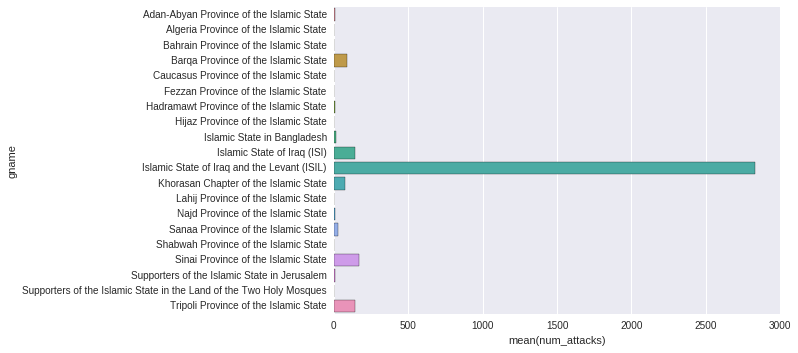

In [61]:
sns.barplot( x = "num_attacks", y = "gname", data = groupsdf.sort_values("gname", ascending = True))

In [74]:
targetdf = pd.DataFrame(groups.reset_index())

targetdf.columns = ["targsubtype1", "num_attacks"]
targetdf

targsubtype1  num_attacks
0                                                   .          104
1                              Affiliated Institution           26
2                        Aircraft (not at an airport)            1
3                                             Airport            3
4                                           Ambulance            4
5                                       Bank/Commerce            7
6                                   Bridge/Car Tunnel           23
7                            Bus (excluding tourists)            5
8                                    Bus Station/Stop            4
9                                        Construction            7
10          Demilitarized Zone (including Green Zone)            1
11  Diplomatic Personnel (outside of embassy, cons...            5
12                                       Domestic NGO            2
13                                   Election-related           14
14                                        Electricity           27
15                                  Embassy/Consulate           12
16              Entertainment/Cultural/Stadium/Casino            6
17                                             Farmer            3
18                                                Gas            4
19                                            Gas/Oil           54
20                Government Building/Facility/Office           44
21  Government Personnel (excluding police, military)           38
22                                      Head of State            1
23                   Highway/Road/Toll/Traffic Signal            1
24                                       Hotel/Resort           10
25                          House/Apartment/Residence          139
26                        Industrial/Textiles/Factory            1
27                                       Intelligence           13
28                                  International NGO            5
29  International Organization (peacekeeper, aid a...            4
..                                                ...          ...
55                                   Place of Worship          103
56    Police Building (headquarters, station, school)           98
57                                  Police Checkpoint           84
58     Police Patrol (including vehicles and convoys)           81
59                    Police Security Forces/Officers          266
60                       Political Party Member/Rally           42
61  Politician or Political Party Movement/Meeting...           46
62                                        Prison/Jail           13
63  Procession/Gathering (funeral, wedding, birthd...           16
64                                          Protester            4
65  Public Area (garden, parking lot, garage, beac...           22
66                          Race/Ethnicity Identified           18
67                    Radio Journalist/Staff/Facility            6
68                                       Refugee Camp            8
69                                Religion Identified           64
70                                   Religious Figure           23
71                                Restaurant/Bar/Café           60
72                              Retail/Grocery/Bakery           37
73             School/University/Educational Building           12
74                                            Student            3
75                                      Taxi/Rickshaw            1
76                       Teacher/Professor/Instructor            6
77               Television Journalist/Staff/Facility           17
78                                          Terrorist           29
79                                            Tourist            1
80                         Train/Train Tracks/Trolley            3
81                       Unnamed Civilian/Unspecified          441
82                            Vehicles/Transportation            9
83                   

In [114]:
targets = ['House/Apartment/Residence','Place of Worship','Unnamed Civilian/Unspecified','Village/City/Town/Suburb','Police Security Forces/Officers']
web2 = df[(df.targsubtype1_txt.isin(targets)) &  (df.iyear >= 2007) &  (df.iyear <=2015)]
web2['num_attacks'] = web2.nkill
web2.head()


eventid  iyear  imonth  iday country_txt     city provstate  \
1   200703010001   2007       3     1        Iraq  Baqubah    Diyala   
11  200706050021   2007       6     5        Iraq    Baiji   Saladin   
15  200710090016   2007      10     9        Iraq  Hawijah    Kirkuk   
18  200804200035   2008       4    20        Iraq  Baqubah    Diyala   
19  200805020012   2008       5     2        Iraq  Mandali    Diyala   

     latitude  longitude                                           location  \
1   33.750000  44.633333                                      Near Ba'qubah   
11  34.929167  43.493056                                                NaN   
15  35.324817  43.766813                              InYayji neighborhood.   
18  33.750000  44.633333   The attack took place in the Wajihilah district.   
19  33.747758  45.552322  The attack took place on the road between Mand...   

       ...                     targsubtype1_txt  natlty1 natlty1_txt  \
1      ...      Police Security Forces/Officers     95.0        Iraq   
11     ...      Police Security Forces/Officers     95.0        Iraq   
15     ...      Police Security Forces/Officers     95.0        Iraq   
18     ...      Police Security Forces/Officers     95.0        Iraq   
19     ...         Unnamed Civilian/Unspecified     95.0        Iraq   

                          gname weaptype1  weaptype1_txt nkill  nwound  \
1   Islamic State of Iraq (ISI)         5       Firearms  14.0     0.0   
11  Islamic State of Iraq (ISI)         5       Firearms   2.0     0.0   
15  Islamic State of Iraq (ISI)         5       Firearms   1.0     0.0   
18  Islamic State of Iraq (ISI)         5       Firearms   2.0     1.0   
19  Islamic State of Iraq (ISI)        13        Unknown   0.0     0.0   

          date num_attacks  
1   2007-03-01        14.0  
11  2007-06-05         2.0  
15  2007-10-09         1.0  
18  2008-04-20         2.0  
19  2008-05-02         0.0  

[5 rows x 26 columns]

In [115]:
missess = web2.pivot(index = 'iyear', columns = 'targsubtype1_txt', values = 'num_attacks')
missess.plot()
plt.ylabel("Popculture names per 1000", fontsize = 12)
plt.xlabel("")
plt.title("Modernized Names in the World", fontsize = 15)
plt.legend(title = "", fontsize = 12)

ValueError: Index contains duplicate entries, cannot reshape

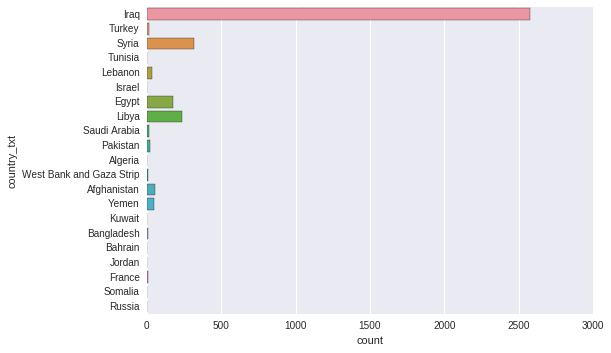

In [38]:
sns.countplot(y = "country_txt", data = df, )


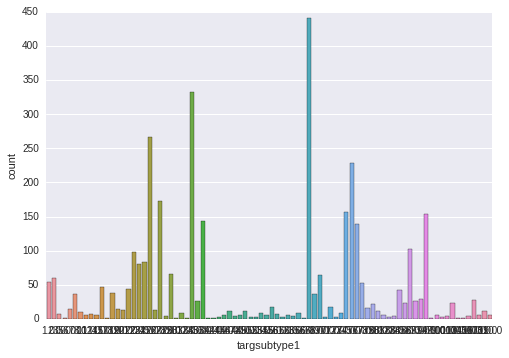

In [73]:
sns.countplot(x = "targsubtype1", data = df)

In [ ]:
sns.barplot( x = instances , y = groups, data = groups)

In [ ]:
sns.set_style('whitegrid')

afro = sns.factorplot(data = web2, x = 'iyear', y = 'nkill', hue = 'city', col = 'gname', palette = ['purple', 'red'], 
                       col_wrap = 2, markers = '.', join = True, sharey = False, size = 10)

afro.set_xticklabels(step = 10)
afro.set_axis_labels('Year', 'Number of Deaths caused')

Excercise 2


In [78]:
df.targsubtype1_txt.unique()

array(['Laborer (General)/Occupation Identified',
       'Police Security Forces/Officers',
       'Government Personnel (excluding police, military)',
       'Religion Identified',
       'Police Patrol (including vehicles and convoys)',
       'Race/Ethnicity Identified', '.',
       'Military Personnel (soldiers, troops, officers, forces)',
       'Non-State Militia', 'Unnamed Civilian/Unspecified',
       'Bus (excluding tourists)', 'Television Journalist/Staff/Facility',
       'Military Recruiting Station/Academy',
       'School/University/Educational Building', 'Place of Worship',
       'Restaurant/Bar/Caf\xc3\xa9', 'Political Party Member/Rally',
       'Vehicles/Transportation',
       'Politician or Political Party Movement/Meeting/Rally',
       'Police Building (headquarters, station, school)',
       'Marketplace/Plaza/Square', 'Bank/Commerce',
       'Public Area (garden, parking lot, garage, beach, public building, camp)',
       'Government Building/Facility/Office', 

In [ ]:
 PLace = df[(df.iyear >= 2007) & (df.iyear <=2015) ].sort_values('nkill', ascending = False)[0:100].country_txt.unique()
PLace